In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

Makeing confusion matrix pretty

In [2]:
def plot_confusion_matrix(cm, title = "Confusion Marix"):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No diabetes', 'Diabetes'])
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()
    

# Importing the dataset

Followed by the data exploration

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(data.shape)

(768, 9)


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Notes on the data
- There are some features with zero values that are not possible (e.g. BMI, blood pressure, etc.)
- 35% out of the 768 patients have diabetes

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], random_state=0)

# Building a simple model

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix 

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('F1 score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))

F1 score:  0.5714285714285715
Precision:  0.5625
Recall:  0.5806451612903226
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       130
           1       0.56      0.58      0.57        62

    accuracy                           0.72       192
   macro avg       0.68      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192

Confusion matrix: 
 [[102  28]
 [ 26  36]]


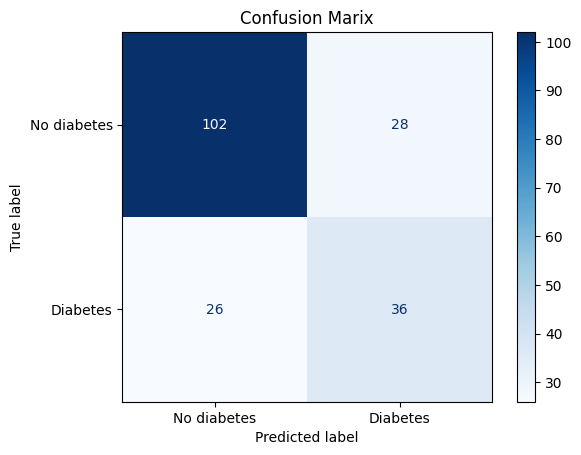

In [9]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

# Improving the model with hyperparameter tuning

We will use GridSearchCV to find the best hyperparameters for the DecisionTreeClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 15),
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': range(3,15)
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print('Best parameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Fitting 10 folds for each of 840 candidates, totalling 8400 fits
Best parameters:  {'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best score:  0.6386687944409618


# Evaluating the model with the best hyperparameters

In [11]:
tree = DecisionTreeClassifier(**grid_search.best_params_, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('F1 score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))


F1 score:  0.634920634920635
Precision:  0.625
Recall:  0.6451612903225806
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       130
           1       0.62      0.65      0.63        62

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192

Confusion matrix: 
 [[106  24]
 [ 22  40]]


In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="single_tree.dot", impurity=False, filled=True, feature_names=data.columns[:-1])

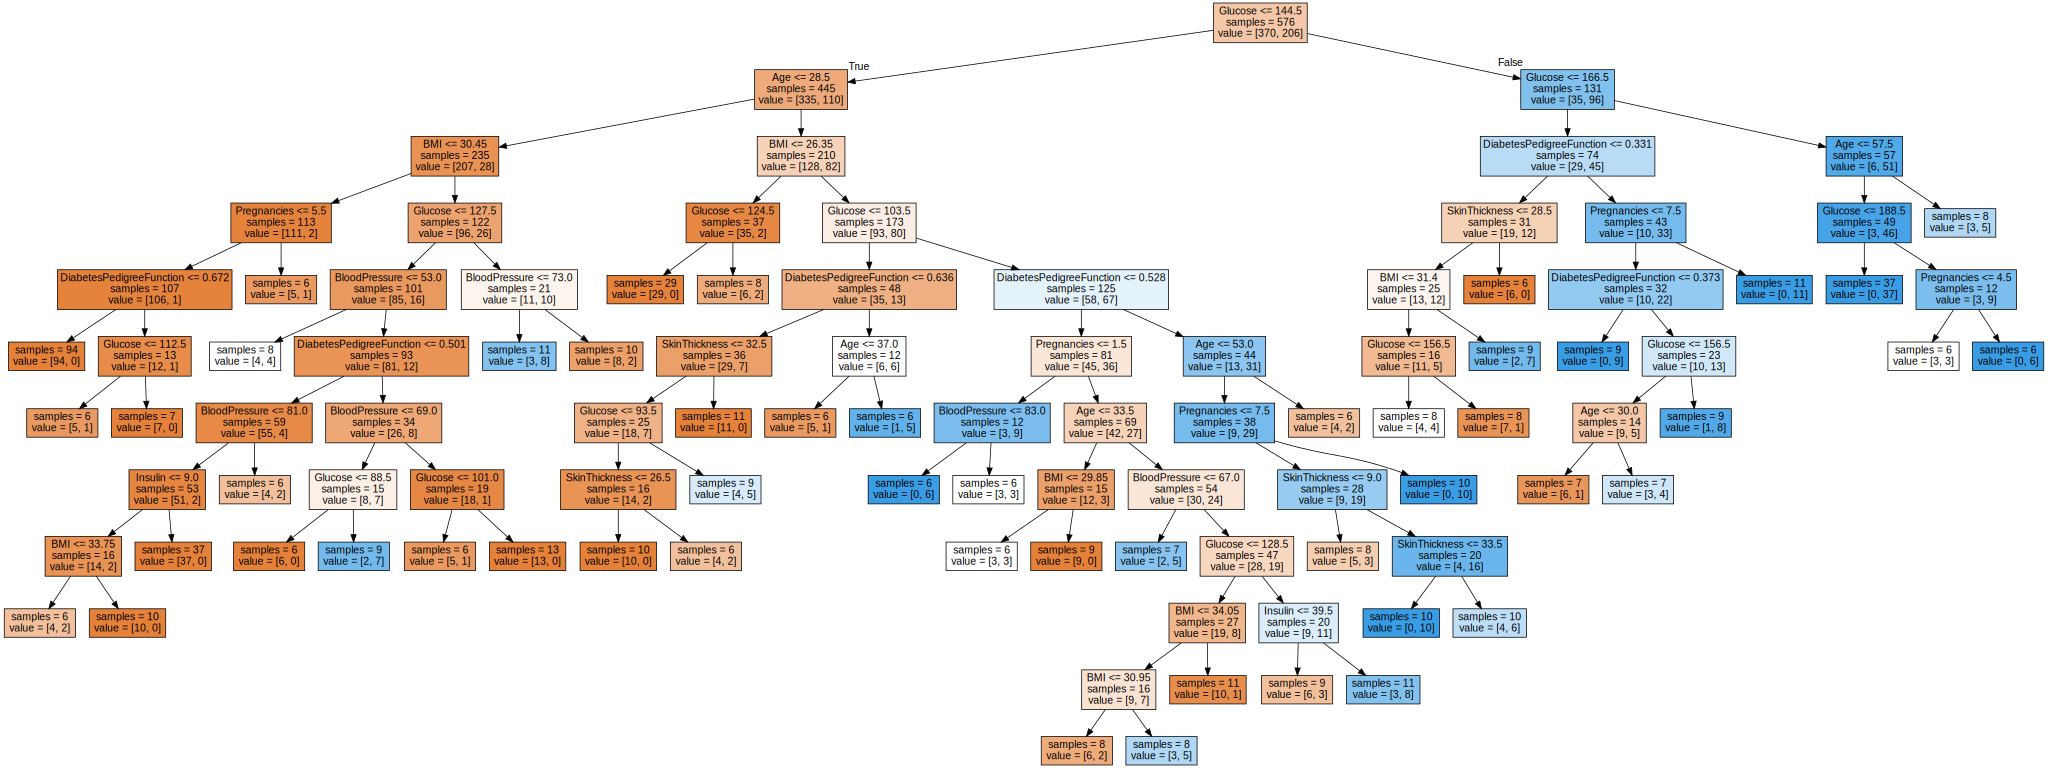

In [13]:
import graphviz

with open("single_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

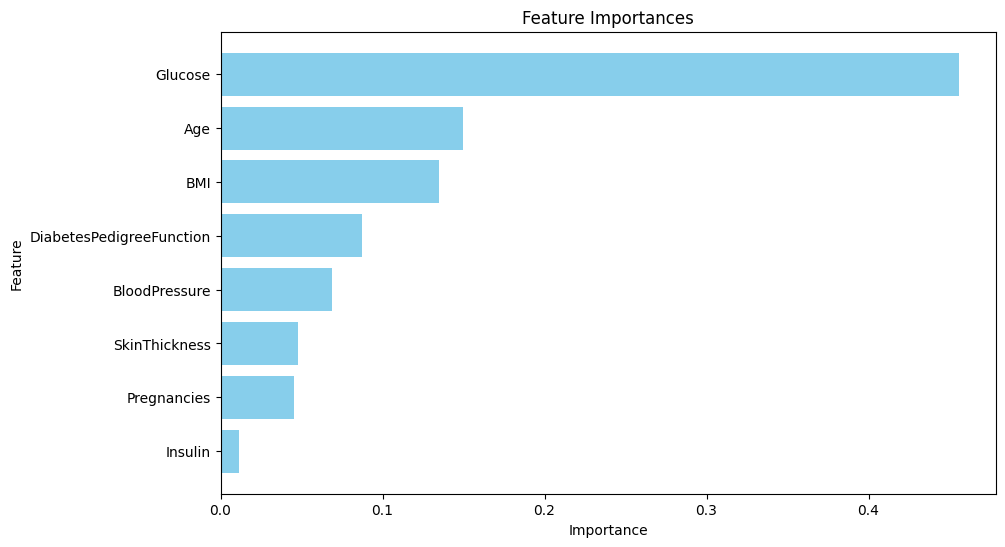

In [14]:
feature_importances = tree.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# Remove the least important features

In [15]:
print(importance_df.iloc[4:]['Feature'])

2    BloodPressure
3    SkinThickness
0      Pregnancies
4          Insulin
Name: Feature, dtype: object


In [16]:
X_test_less = X_test.drop(importance_df['Feature'].iloc[4:], axis=1)
X_train_less = X_train.drop(importance_df['Feature'].iloc[4:], axis=1)
X_train_less.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
762,89,22.5,0.142,33
127,118,33.3,0.261,23
564,91,32.4,0.601,27
375,140,39.2,0.528,58
663,145,37.9,0.637,40


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 15),
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': range(3,15)
}

grid_search_less = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_less.fit(X_train_less, y_train)
print('Best parameters: ', grid_search_less.best_params_)
print('Best score: ', grid_search_less.best_score_)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
Best parameters:  {'max_depth': 7, 'min_samples_leaf': 11, 'min_samples_split': 2}
Best score:  0.6284452215051551


In [18]:
tree_less = DecisionTreeClassifier(**grid_search.best_params_, random_state=0)
tree_less.fit(X_train_less, y_train)
y_pred_less = tree_less.predict(X_test_less)

print('F1 score: ', f1_score(y_test, y_pred_less))
print('Precision: ', precision_score(y_test, y_pred_less))
print('Recall: ', recall_score(y_test, y_pred_less))
print('Classification report: \n', classification_report(y_test, y_pred_less))

F1 score:  0.6774193548387096
Precision:  0.6774193548387096
Recall:  0.6774193548387096
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       130
           1       0.68      0.68      0.68        62

    accuracy                           0.79       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.79      0.79      0.79       192



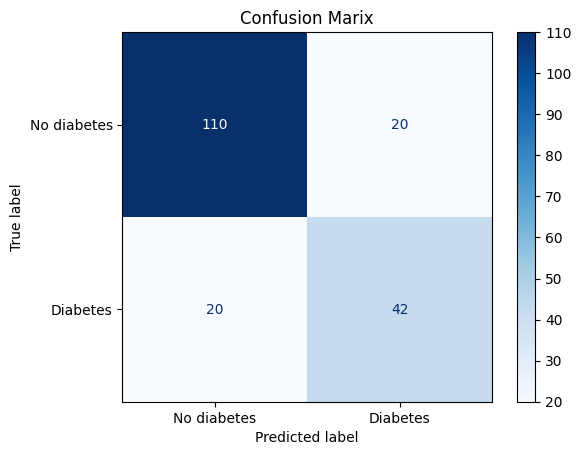

In [19]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_less))

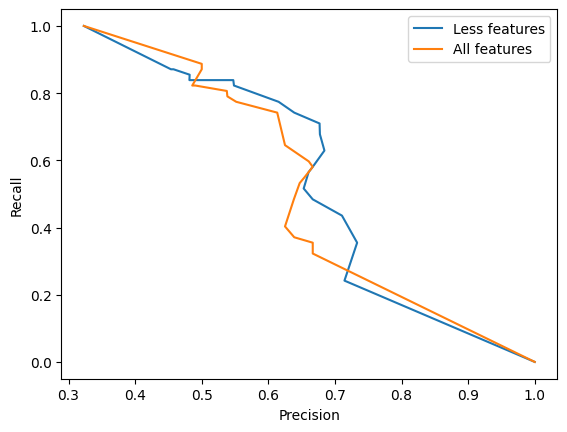

In [20]:
from sklearn.metrics import precision_recall_curve, roc_curve

precision_less, recall_less, thresholds_less = precision_recall_curve(y_test, tree_less.predict_proba(X_test_less)[:, 1])

precision, recall, thresholds = precision_recall_curve(y_test, tree.predict_proba(X_test)[:, 1])

plt.plot(precision_less, recall_less, label='Less features')

plt.plot(precision, recall, label='All features')


plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

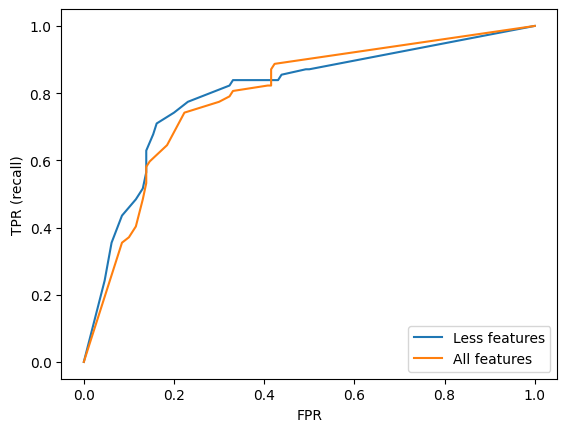

In [21]:
fpr_less, tpr_less, thresholds_less = roc_curve(y_test, tree_less.predict_proba(X_test_less)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

plt.plot(fpr_less, tpr_less, label='Less features')

plt.plot(fpr, tpr, label='All features')

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)


# The model with less features has a better F1 score, precision and recall

Lets compare it with the Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=9, random_state=0)
forest.fit(X_train_less, y_train)
y_pred_forest = forest.predict(X_test_less)

In [23]:
print('-----------------Forest-----------------')
print('F1 score: ', f1_score(y_test, y_pred_forest), f1_score(y_test, y_pred_less))
print('Precision: ', precision_score(y_test, y_pred_forest))
print('Recall: ', recall_score(y_test, y_pred_forest))
print('Classification report: \n', classification_report(y_test, y_pred_forest))

print('-----------------Decision tree-----------------')
print('F1 score: ', f1_score(y_test, y_pred_less))
print('Precision: ', precision_score(y_test, y_pred_less))
print('Recall: ', recall_score(y_test, y_pred_less))
print('Classification report: \n', classification_report(y_test, y_pred_less))


scores = pd.DataFrame({'F1': [f1_score(y_test, y_pred_forest), f1_score(y_test, y_pred_less)], 
                       'Precision': [precision_score(y_test, y_pred_forest), precision_score(y_test, y_pred_less)],
                       'Recall': [recall_score(y_test, y_pred_forest), recall_score(y_test, y_pred_less)]}, index=['Forest', 'Decision tree'])

-----------------Forest-----------------
F1 score:  0.6071428571428571 0.6774193548387096
Precision:  0.68
Recall:  0.5483870967741935
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.68      0.55      0.61        62

    accuracy                           0.77       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192

-----------------Decision tree-----------------
F1 score:  0.6774193548387096
Precision:  0.6774193548387096
Recall:  0.6774193548387096
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       130
           1       0.68      0.68      0.68        62

    accuracy                           0.79       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.79      0.79      0.79       192



<Axes: >

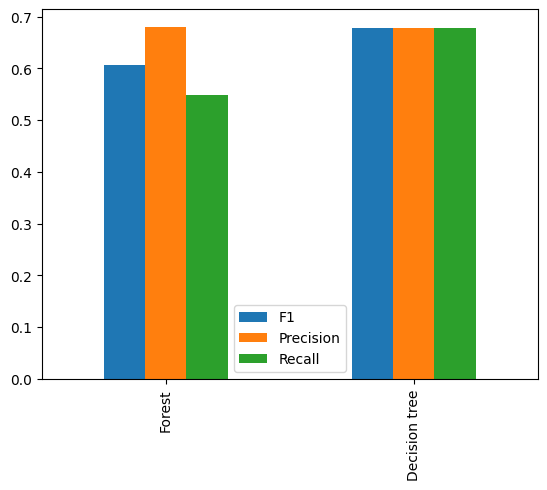

In [24]:
scores.plot(kind='bar')

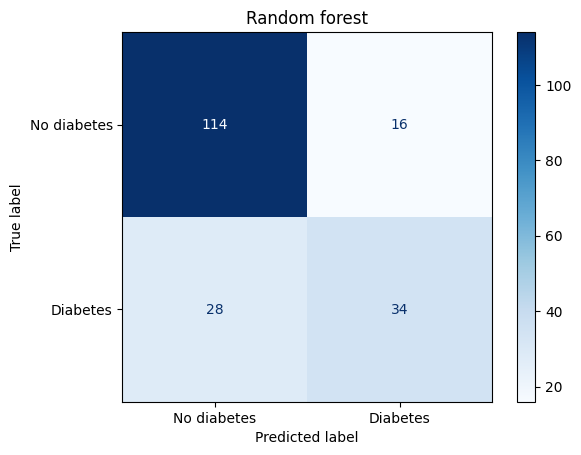

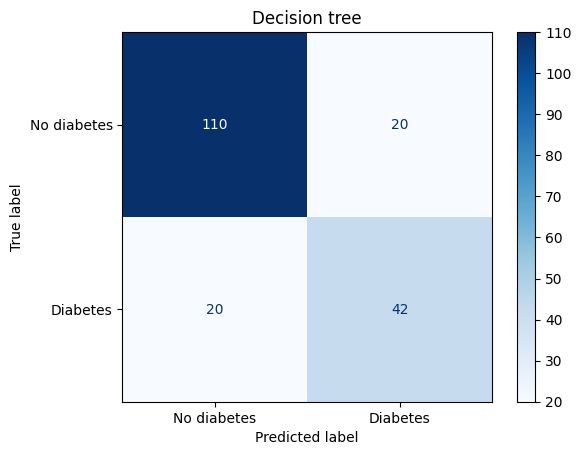

In [25]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_forest), title='Random forest')

plot_confusion_matrix(confusion_matrix(y_test, y_pred_less), title='Decision tree')

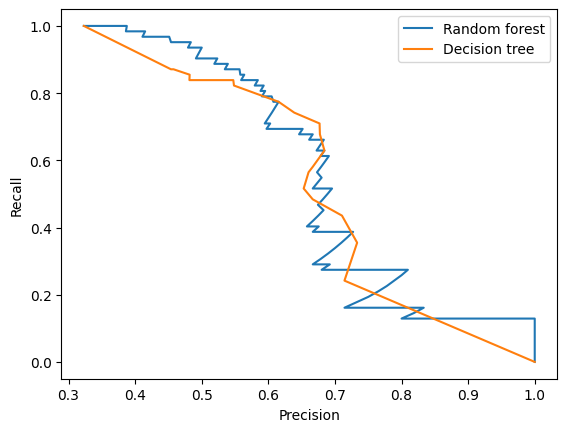

In [26]:
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_test, forest.predict_proba(X_test_less)[:, 1])

plt.plot(precision_forest, recall_forest, label='Random forest')

plt.plot(precision_less, recall_less, label='Decision tree')


plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

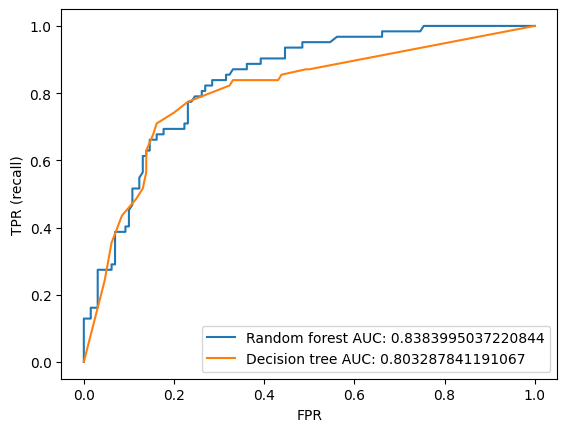

In [27]:
from sklearn.metrics import roc_auc_score

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, forest.predict_proba(X_test_less)[:, 1])

labelForest = 'Random forest AUC: ' + str(roc_auc_score(y_test, forest.predict_proba(X_test_less)[:, 1]))
plt.plot(fpr_forest, tpr_forest, label=labelForest)

labelTree = 'Decision tree AUC: ' + str(roc_auc_score(y_test, tree_less.predict_proba(X_test_less)[:, 1]))
plt.plot(fpr_less, tpr_less, label=labelTree)

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)
